In [2]:
import json
# import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
import pickle
# from constants import *
# import rioxarray as rxr
import geopandas as gpd
from locale import atof, setlocale, LC_NUMERIC
from pyproj import crs
import sys

import contextily as cx


# plt.style.use(home_ir+'stylefile.mplstyle')
# setlocale(LC_NUMERIC,'')
# atof('123,123')
#homedir = '/global/home/users/cowherd/snow_fires/'
# datadir = '/global/scratch/users/cowherd/'

homedir = '/home/marianne/Documents/snow_fires/'
rawdatadir = '/home/marianne/Documents/data/'
#datadir = homedir + 'data/'
# homedir = '/global/home/users/cowherd/snow_fires/'
# rawdatadir = '/global/scratch/users/cowherd/'

os.chdir(homedir)


wgs_crs = crs.CRS('epsg:4326')
use_crs = wgs_crs


In [4]:
## load fire data
rawdatadir = '/home/marianne/data/'
datadir = '/home/marianne/Documents/snow_fires/data/'

# wfigs 2021 fires perimeters
# wfigs21 = gpd.read_file(rawdatadir + 'InteragencyPerimeters2021/FH_Perimeter.shp').to_crs(wgs_crs)
# interagency historic record fire preimeters
# fires_allyears = gpd.read_file(rawdatadir + 'Interagency_Fire_Perimeter_History/InteragencyFirePerimeterHistory.shp').to_crs(wgs_crs)

gages_metadata = gpd.read_file(rawdatadir + 'snow_fires_data/gages_metadata.gdf').to_crs(wgs_crs)
fires_allyears = gpd.read_file(rawdatadir + 'snow_fires_data/fires_allyears.gdf').to_crs(wgs_crs)
# bas_all = gpd.read_file(rawdatadir + 'snow_fires_data/bas_all.gdf').to_crs(wgs_crs)
gaged_basins_gdf = gpd.read_file(rawdatadir + 'snow_fires_data/gaged_basins_gdf.gdf').to_crs(wgs_crs)
# snowzone = gpd.read_file(rawdatadir + 'data/snowzone/snowzone.shp').to_crs(wgs_crs)

with open(datadir + 'gaged_basins.pickle', 'rb') as handle:
    gaged_basins = pickle.load(handle)
    
with open(datadir + 'streamflow_metadata.pickle', 'rb') as handle:
    streamflow_metadata = pickle.load(handle)
    
with open(datadir + 'target_basins.pickle', 'rb') as handle:
    target_basins = pickle.load(handle)

In [6]:
# 
# from load_data import *
## gives fires_allyears, wfigs20, gages_metadata, bas_all, gaged_basins_gdf, snowzone
## all in wgs crs
snowzone = gpd.read_file('/home/marianne/data/snowzone/snowzone.shp').to_crs(wgs_crs)


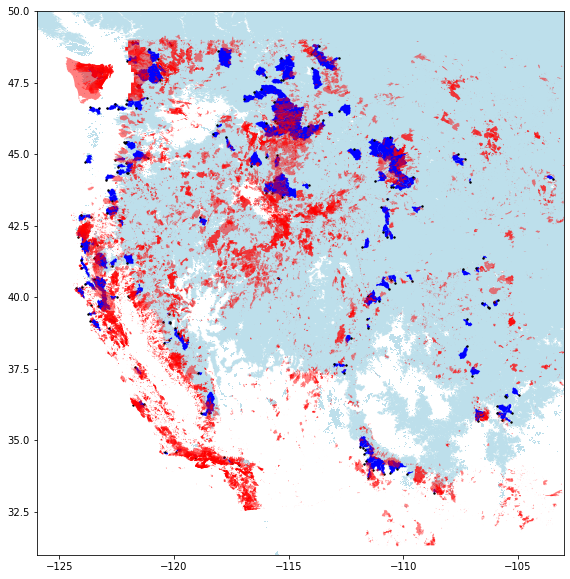

In [23]:
## plot showing gaged basins that fit the williams parameters, location of the gages, and fire boundaries
fig,ax=plt.subplots(figsize=(10,10))
snowzone.plot(ax=ax, color='lightblue',alpha=0.8) ## snowzone
gaged_basins_gdf.plot(ax=ax,color='blue') ##outlines of gaged basins
gages_metadata.plot(ax=ax,color='k',markersize=2)
fires_allyears.plot(ax=ax,color='red',alpha=0.5) ## fires
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
plt.show()
# plt.savefig(homedir + 'figures/snowzone_context.jpg')


In [24]:
## get fires from all years that are in the gaged watersheds
# gaged_fires = gpd.sjoin(fires_allyears,gaged_basins)


#gaged_fires = gpd.overlay(fires_allyears,gaged_basins)

jc_id = '13313000'
jc_basin = gaged_basins[gaged_basins.GAGE_ID==jc_id]
lg_id = '06192500'
lg_basin = gaged_basins[gaged_basins.GAGE_ID==lg_id]
## large basin is the yellowstone river near billings MT

In [132]:
gaged_fires = gpd.overlay(gaged_basins,fires_allyears)

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

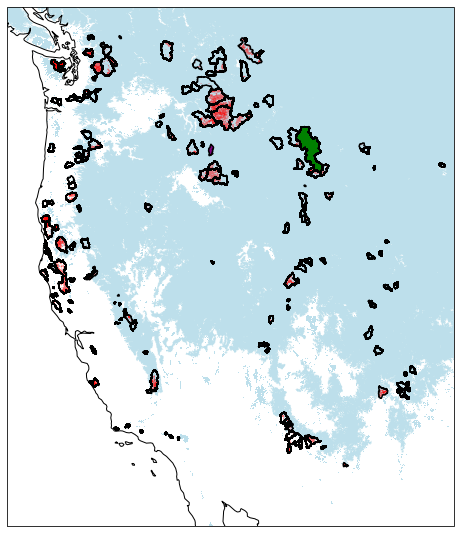

In [27]:
import cartopy.crs as ccrs
fig = plt.figure(figsize=(8, 12))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
snowzone.plot(ax=ax, color='lightblue',alpha=0.8) ## snowzone
gaged_fires.plot(ax=ax,color='red',alpha=0.5)
gaged_basins.boundary.plot(ax=ax,color='black')
lg_basin.plot(ax=ax,color='green')
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
jc_basin.plot(ax=ax,color='purple')
# cx.add_basemap(ax,crs = wgs_crs,source=cx.providers.OpenTopoMap)
plt.show()

In [8]:
snow_in = gpd.overlay(gaged_basins,snowzone)

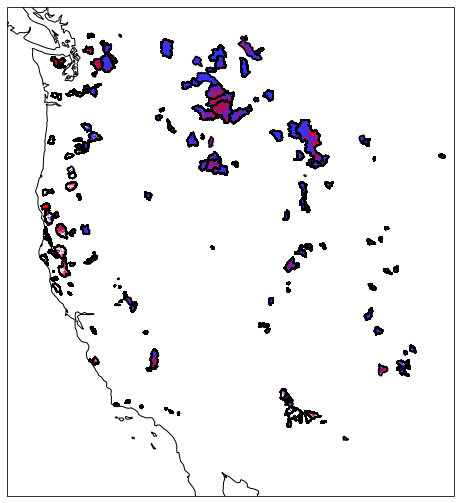

In [28]:
import cartopy.crs as ccrs
fig = plt.figure(figsize=(8, 12))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
snow_in.plot(ax=ax,color='blue',alpha = 0.8)
gaged_basins.boundary.plot(ax=ax,color='k')
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
gaged_fires.plot(ax=ax,color='red',alpha=0.5)
plt.show()

## is the seasonal snow cover zone changing in time? partition accumulation and melt, compare accumulation vs. ablation vs. timing
## freq of SCA before and after
## SDD
## more meaningful wrt fire analysis
## comparison/assessment of reanalysis at burned sites
## sentinel1 csnow, university of arizona reanalysis data set. is that checked w/ snotel?
## https://nsidc.org/data/nsidc-0719

<AxesSubplot:>

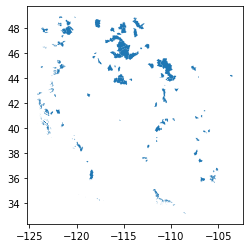

In [32]:
gages = np.unique(gaged_fires.GAGE_ID)
years = []
props_burned = []
gage_ids = []
burned_areas = []
basin_areas = []
snowy_areas = []
snowy_burned_areas = []
for i in gages: #range(len(gaged_basins)):
    #basin = gaged_basins.loc[i]
    prop_burned = []
    fire_year = []
    fires_in = gaged_fires.loc[gaged_fires.GAGE_ID == i]
    snow_in_basin = snow_in.loc[snow_in.GAGE_ID == i]
    snowy_areas.append(np.nansum(snow_in_basin.to_crs('epsg:5070').area))
    yrs = np.unique(fires_in.FIRE_YEAR_)
    basin_area = np.nansum(gaged_basins.loc[gaged_basins.GAGE_ID==i].to_crs('epsg:5070').area)
    burned_areas_all = []
    snowy_yr = []
    for y in yrs:
        fires_tmp = fires_in[fires_in.FIRE_YEAR_ == y]
        burned_area = np.sum(fires_tmp.to_crs('epsg:5070').area)
        prop_burned.append(burned_area/basin_area)
        burned_areas_all.append(burned_area)
        snow_in_burn = gpd.overlay(fires_tmp,snow_in_basin)
        snowy_yr.append(np.nansum(snow_in_burn.to_crs('epsg:5070').area))
    years.append(yrs)
    props_burned.append(prop_burned)
    gage_ids.append(i)
    burned_areas.append(burned_areas_all)
    basin_areas.append(basin_area)
    snowy_burned_areas.append(snowy_yr)


burn_snow_history = pd.DataFrame({
            'year':years,
            'burned_area': burned_areas ,
            'basin_area':basin_areas,
            'burned_prop':props_burned,
            'gage_id':gage_ids,
            'snowy_area':snowy_areas,
            'snowy_burned_area': snowy_burned_areas
        })


In [ ]:
with open(datadir + 'burn_snow_history.pickle', 'wb') as handle:
    pickle.dump(burn_history_data, handle,protocol=pickle.HIGHEST_PROTOCOL)
    

In [7]:
with open(datadir + 'burn_snow_history.pickle', 'rb') as handle:
    burn_snow_history = pickle.read(handle)
    

EOFError: Ran out of input

In [8]:
burn_snow_history
##now just need elevation profile for each basin... to do on thursday

NameError: name 'burn_snow_history' is not defined

In [1]:
burn_snow_history.year

NameError: name 'burn_snow_history' is not defined

In [50]:
x= [burn_snow_history.burned_prop[i][-1] for i in range(len(burn_snow_history))]
y= [burn_snow_history.snowy_burned_area[i][-1]/burn_snow_history.basin_area[i] for i in range(len(burn_snow_history))]


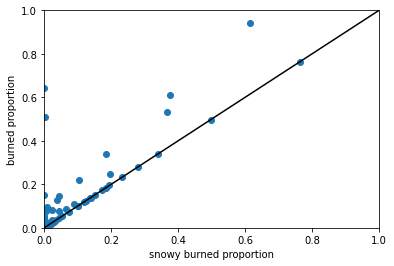

In [59]:
fig,ax=plt.subplots()
ax.plot(y,x,'o')
ax.set_xlabel('snowy burned proportion')
ax.set_ylabel('burned proportion')
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.plot([0,1],[0,1],'k-')
plt.show()

In [212]:
# fig,ax=plt.subplots()
for id in gages[-3:-1]:
    id = '14400000'
    try:
        sf =pickle.load(open(datadir + 'streamflow'+id+'.pickle','rb'))
        dates = [dt.datetime.strptime(sf.index[i].split('T')[0],'%Y-%m-%d') for i in range(len(sf))]
        # prefire_t = dates[dates.year < sf.fireyear[0]]
        print(id)
    except:
        print('no' + id)
        continue
sf

14400000
14400000


,streamflow,fireyear
1988-10-01T00:30:00.000-07:00,77.0,2017.0
1988-10-01T01:00:00.000-07:00,77.0,2017.0
1988-10-01T01:30:00.000-07:00,77.0,2017.0
1988-10-01T02:00:00.000-07:00,77.0,2017.0
1988-10-01T02:30:00.000-07:00,75.0,2017.0
...,...,...
2022-05-06T08:30:00.000-07:00,6720,2017.0
2022-05-06T08:45:00.000-07:00,6770,2017.0
2022-05-06T09:00:00.000-07:00,6720,2017.0
2022-05-06T09:15:00.000-07:00,6770,2017.0


In [204]:
streamflow_metadata

,Gauge_ID,Latitude,Longitude,Fire_Year
0,05014500,48.7991,-113.6568,NaN
1,06019500,45.1924,-112.1425,NaN
2,06043500,45.4974,-111.2705,NaN
3,06093200,48.3700,-112.8028,2015.0
4,06192500,45.5972,-110.5660,1988.0
...,...,...,...,...
174,14309500,42.8040,-123.6109,NaN
175,14316700,43.3498,-122.7289,NaN
176,14325000,42.8915,-124.0707,NaN
177,14332000,42.7082,-122.3928,NaN


'06093200'

In [233]:
dates = [dt.datetime.strptime(sf.index[i].split('T')[0],'%Y-%m-%d') for i in range(len(sf))]
sf['dt'] = dates
years = [v.year for v in dates]
sf['year'] = years
wateryears = []
for v in dates:
    if v.month>9:
        wateryears.append(v.year)
    else:
        wateryears.append(v.year-1)
sf['wy'] = wateryears
prefire_t = []
postfire_t= []
prefire_sf = []
postfire_sf = []
fire_t = []
fire_sf = []
for i in range(len(dates)):
    if (dates[i].year < sf.fireyear[0]): 
        prefire_t.append(dates[i])
        prefire_sf.append(float(sf.streamflow.values[i]))
    elif (dates[i].year > sf.fireyear[0]): 
        postfire_t.append(dates[i])
        postfire_sf.append(float(sf.streamflow.values[i]))
    else:
        fire_t.append(dates[i])
        fire_sf.append(float(sf.streamflow.values[i]))



In [241]:
totflows = []
peakflows = []
peakdays = []
wys=[]
startyear = dates[0].year
endyear = dates[-1].year
for yr in range(startyear,endyear):
    try:
        thisyear = sf.loc[sf.wy == yr]
        peakdays.append(np.nanargmax(thisyear.streamflow.astype(float)))
        totflows.append(np.nansum(thisyear.streamflow.values.astype(float)))
        peakflows.append(np.nanmax(thisyear.streamflow.astype(float)))
        wys.append(yr)
    except:
        continue

sumflow = pd.DataFrame(data = {'wy':wys,
                                'sumflow':totflows,
                                'peakflow':peakflows,
                                'peakday':peakdays})

In [240]:
len(peakdays)

33

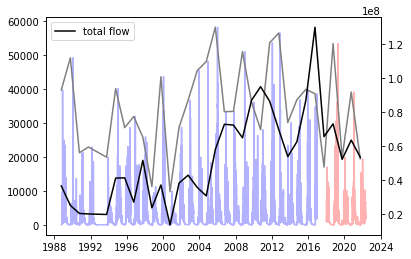

In [246]:
fig,ax=plt.subplots()
ax2 =ax.twinx()
wydts = [dt.datetime(year=val,day=1,month=10) for val in sumflow.wy]
ax.plot(prefire_t,prefire_sf,color='blue',alpha=0.3)
ax.plot(postfire_t,postfire_sf,color='red',alpha=0.3)
ax.plot(wydts,sumflow.peakflow,color='gray',label='peak flow')
ax2.plot(wydts,sumflow.sumflow,color='k',label='total flow')
# ax3.plot(wydts,sumflow.peakday,color='green')

'''ax.plot(sumflow.wy,sumflow.sumflow)
ax2.plot(sumflow.wy,sumflow.peakflow,color='purple')
ax3.plot(sumflow.wy,sumflow.peakday,color='green')
ax4.plot(prefire_t,prefire_sf,color='blue')
ax4.plot(postfire_t,postfire_sf,color='red')
ax.set_xlim(1995,2021)
ax4.set_xlim(dt.datetime(year=1995,day=1,month=1),dt.datetime(year=2021,day=1,month=1))'''
plt.legend()
plt.show()


[]

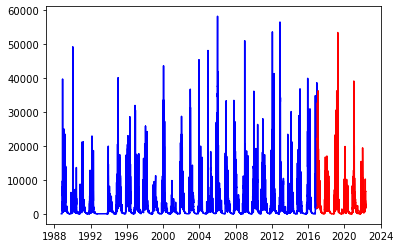

In [106]:
fig,ax=plt.subplots()
ax.plot(prefire_t,prefire_sf,'-',color='blue')
ax.plot(postfire_t,postfire_sf,'-',color='red')
plt.show()

In [112]:
#with open(datadir + 'burn_snow_history_2.pickle', 'rb') as handle:
 #   burn_history_data = pick=le.load(handle)
bhd=pickle.load(open(datadir+ 'burn_snow_history.pickle','rb'))
bhd['snowy_prop'] = bhd.snowy_area/bhd.basin_area

sba_props = []
sba_xsprops = []
for j in range(len(bhd)):
    entry = bhd.loc[j]
    sba_prop = []
    sba_xs = []
    for i in range(len(entry.year)):
        batmp = entry.burned_area[i]
        sbatmp = entry.snowy_burned_area[i]
        sbaproptmp = sbatmp/batmp
        sba_prop.append(sbaproptmp)
        sba_xs.append(sbaproptmp - entry.snowy_prop)
    sba_props.append(sba_prop)
    sba_xsprops.append(sba_xs)

bhd['burned_snow_xs'] = sba_xsprops
bhd['snow_burned_prop'] = sba_props
    

/tmp/ipykernel_12088/1652786762.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sbaproptmp = sbatmp/batmp


In [25]:
bhd.loc[0].burned_area[0]

17245664.65652508

,year,burned_area,basin_area,burned_prop,gage_id,snowy_area,snowy_burned_area,snowy_prop,snow_burned_prop
0,"[1936.0, 2003.0]","[17245664.65652508, 129483.53362334787]",7.972885e+07,"[0.21630395554497056, 0.001624048771589287]",05014500,7.972885e+07,"[17245664.65652509, 129483.53362334787]",1.000000,"[1.0000000000000007, 1.0]"
1,"[1988.0, 1995.0, 1999.0, 2000.0, 2002.0, 2013....","[14216949.230548399, 1318211.0759997119, 11881...",1.324337e+09,"[0.010735145043645363, 0.000995374385145136, 0...",06019500,1.324337e+09,"[14216949.23054839, 1318211.0759997116, 118810...",1.000000,"[0.9999999999999993, 0.9999999999999998, 1.0, ..."
2,"[1931.0, 1949.0, 1974.0, 1979.0, 1988.0, 1999....","[266594.56587694597, 5945226.402772838, 114094...",2.120421e+09,"[0.00012572718873560187, 0.0028037953420337993...",06043500,2.120421e+09,"[266594.56587694597, 5945226.402772841, 114094...",1.000000,"[1.0, 1.0000000000000004, 1.0000000000000007, ..."
3,"[1910.0, 1981.0, 1988.0, 2007.0, 2011.0, 2015....","[45792996.38792689, 642764.5358952199, 63429.4...",3.968206e+08,"[0.11539973448690019, 0.0016197860509398739, 0...",06093200,3.968206e+08,"[45792996.38792685, 642764.53589522, 63429.463...",1.000000,"[0.999999999999999, 1.0000000000000002, 1.0000..."
4,"[1889.0, 1900.0, 1910.0, 1919.0, 1931.0, 1932....","[17888107.740010135, 7849167.235793588, 457132...",9.209011e+09,"[0.0019424569435291291, 0.0008523355080194725,...",06192500,9.209011e+09,"[17888107.74001014, 7849167.23579359, 45713243...",1.000000,"[1.0000000000000002, 1.0000000000000002, 0.999..."
...,...,...,...,...,...,...,...,...,...
156,"[1900.0, 1914.0, 1936.0, 1974.0, 1980.0, 2005....","[4127266.253236077, 6743556.2893844, 35278573....",2.249230e+08,"[0.018349681626846533, 0.02998161575980214, 0....",14309500,1.000590e+08,"[0.0, 3699889.739700947, 16540215.841857847, 1...",0.444859,"[0.0, 0.5486555729541778, 0.46884593636290334,..."
157,"[1946.0, 1961.0, 1987.0, 1996.0, 2002.0, 2008....","[33303.754746702005, 31344.896836358523, 17223...",5.879015e+08,"[5.664853043291103e-05, 5.3316581143954955e-05...",14316700,2.613560e+08,"[33303.75474670202, 31344.89683635852, 555213....",0.444557,"[1.0000000000000004, 0.9999999999999999, 0.322..."
158,"[1900.0, 1936.0, 1958.0, 1959.0, 1962.0, 1964....","[8247239.259725144, 2445142.3069167794, 104769...",4.430782e+08,"[0.01861350868364311, 0.005518534885339973, 0....",14325000,2.296224e+08,"[6808215.931162998, 1425961.4280524715, 104769...",0.518244,"[0.825514540897398, 0.5831813649531705, 0.9999..."
159,"[1900.0, 1910.0, 1914.0, 1936.0, 1992.0, 2006....","[28192623.223065287, 27859632.988670573, 10888...",2.173080e+08,"[0.1297357573929018, 0.1282034154067792, 0.050...",14332000,2.112663e+08,"[28192623.223065276, 27859632.988669977, 10888...",0.972198,"[0.9999999999999996, 0.9999999999999786, 1.000..."


(0.0, 1.0)

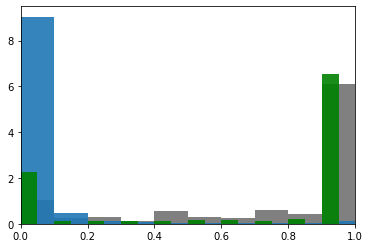

In [109]:
fig,ax=plt.subplots()
ax.hist(bhd.snowy_prop,alpha = 1, density=True,color='gray')
tmp = []
for i in bhd.snow_burned_prop:
    for j in i:
        tmp.append(j)

tmp2 = []
for i in bhd.burned_prop:
    for j in i:
        tmp2.append(j)
tmp3 = [np.nanmin([1,val]) for val in tmp2]
ax.hist(tmp3,alpha = .9,density=True,bins=10)
ax.hist(tmp,alpha = 0.9,density=True,width = 0.05,bins=10,color='green')
ax.set_xlim((0,1))


(array([  12.,   50.,   18.,   82.,  128.,  242.,   90.,   86.,  134.,
        3339.,  337.,  364.,  158.,  105.,  115.,  144.,   54.,   74.,
          67., 1568.]),
 array([-0.94183101, -0.84473945, -0.74764789, -0.65055633, -0.55346477,
        -0.45637321, -0.35928165, -0.26219009, -0.16509853, -0.06800697,
         0.02908459,  0.12617615,  0.22326771,  0.32035927,  0.41745083,
         0.51454239,  0.61163395,  0.70872551,  0.80581707,  0.90290863,
         1.00000019]),
 <BarContainer object of 20 artists>)

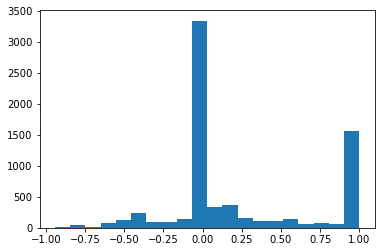

In [115]:
## excess snow burned
for i in bhd.burned_snow_xs:
    for j in i:
        tmp.append(j)
plt.hist(tmp,bins = 20)

1.0000001860353298

In [111]:
bhd

,year,burned_area,basin_area,burned_prop,gage_id,snowy_area,snowy_burned_area,snowy_prop,snow_burned_prop
0,"[1936.0, 2003.0]","[17245664.65652508, 129483.53362334787]",7.972885e+07,"[0.21630395554497056, 0.001624048771589287]",05014500,7.972885e+07,"[17245664.65652509, 129483.53362334787]",1.000000,"[1.0000000000000007, 1.0]"
1,"[1988.0, 1995.0, 1999.0, 2000.0, 2002.0, 2013....","[14216949.230548399, 1318211.0759997119, 11881...",1.324337e+09,"[0.010735145043645363, 0.000995374385145136, 0...",06019500,1.324337e+09,"[14216949.23054839, 1318211.0759997116, 118810...",1.000000,"[0.9999999999999993, 0.9999999999999998, 1.0, ..."
2,"[1931.0, 1949.0, 1974.0, 1979.0, 1988.0, 1999....","[266594.56587694597, 5945226.402772838, 114094...",2.120421e+09,"[0.00012572718873560187, 0.0028037953420337993...",06043500,2.120421e+09,"[266594.56587694597, 5945226.402772841, 114094...",1.000000,"[1.0, 1.0000000000000004, 1.0000000000000007, ..."
3,"[1910.0, 1981.0, 1988.0, 2007.0, 2011.0, 2015....","[45792996.38792689, 642764.5358952199, 63429.4...",3.968206e+08,"[0.11539973448690019, 0.0016197860509398739, 0...",06093200,3.968206e+08,"[45792996.38792685, 642764.53589522, 63429.463...",1.000000,"[0.999999999999999, 1.0000000000000002, 1.0000..."
4,"[1889.0, 1900.0, 1910.0, 1919.0, 1931.0, 1932....","[17888107.740010135, 7849167.235793588, 457132...",9.209011e+09,"[0.0019424569435291291, 0.0008523355080194725,...",06192500,9.209011e+09,"[17888107.74001014, 7849167.23579359, 45713243...",1.000000,"[1.0000000000000002, 1.0000000000000002, 0.999..."
...,...,...,...,...,...,...,...,...,...
156,"[1900.0, 1914.0, 1936.0, 1974.0, 1980.0, 2005....","[4127266.253236077, 6743556.2893844, 35278573....",2.249230e+08,"[0.018349681626846533, 0.02998161575980214, 0....",14309500,1.000590e+08,"[0.0, 3699889.739700947, 16540215.841857847, 1...",0.444859,"[0.0, 0.5486555729541778, 0.46884593636290334,..."
157,"[1946.0, 1961.0, 1987.0, 1996.0, 2002.0, 2008....","[33303.754746702005, 31344.896836358523, 17223...",5.879015e+08,"[5.664853043291103e-05, 5.3316581143954955e-05...",14316700,2.613560e+08,"[33303.75474670202, 31344.89683635852, 555213....",0.444557,"[1.0000000000000004, 0.9999999999999999, 0.322..."
158,"[1900.0, 1936.0, 1958.0, 1959.0, 1962.0, 1964....","[8247239.259725144, 2445142.3069167794, 104769...",4.430782e+08,"[0.01861350868364311, 0.005518534885339973, 0....",14325000,2.296224e+08,"[6808215.931162998, 1425961.4280524715, 104769...",0.518244,"[0.825514540897398, 0.5831813649531705, 0.9999..."
159,"[1900.0, 1910.0, 1914.0, 1936.0, 1992.0, 2006....","[28192623.223065287, 27859632.988670573, 10888...",2.173080e+08,"[0.1297357573929018, 0.1282034154067792, 0.050...",14332000,2.112663e+08,"[28192623.223065276, 27859632.988669977, 10888...",0.972198,"[0.9999999999999996, 0.9999999999999786, 1.000..."


AxisError: axis 1 is out of bounds for array of dimension 0

In [77]:
np.sum(fires_in.to_crs('epsg:5070').area), np.nansum(gaged_basins.loc[gaged_basins.GAGE_ID==i].to_crs('epsg:5070').area)

(17375148.190148428, 79728845.5177586)

In [78]:
np.sum(fires_in.to_crs('epsg:5070').area)/np.nansum(gaged_basins.loc[gaged_basins.GAGE_ID==i].to_crs('epsg:5070').area) # percent burned!!

0.21792800431655984

In [139]:
## binning: accumulation vs melt. elevation, latitude. try to disentangle accumulation vs melt. derive some metrics? slope
## keithe musselman triangle model for snow slope

#time series , runoff ratio?
## nldas download? 

## metric derived? for SWE triangle, streamflow?
## meeting on tuesday 10pm

<AxesSubplot:>

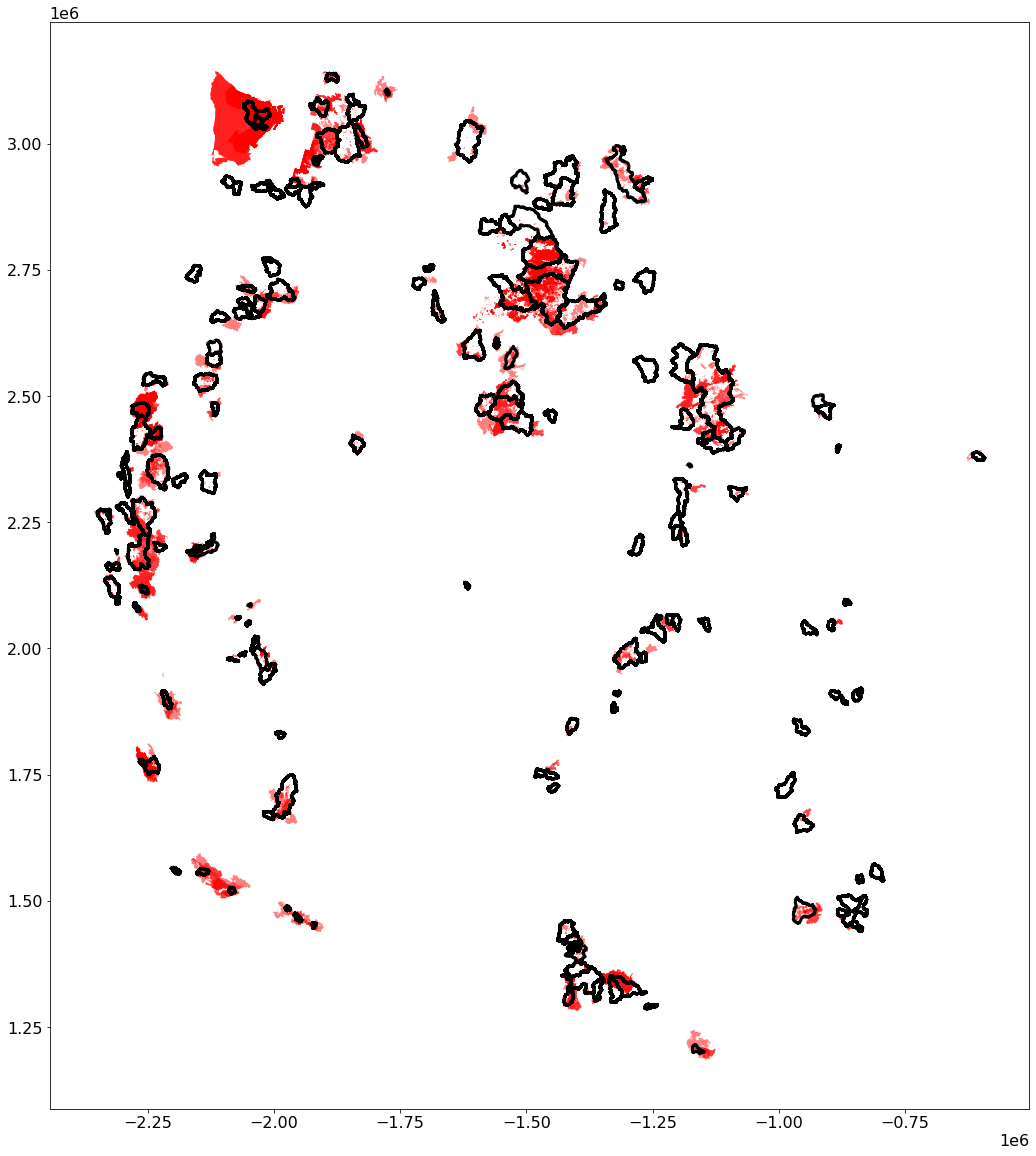

In [140]:
sudo apt-get install GlobalProtect_UI_deb-6.0.0.1-44.deb

In [ ]:
# gaged_basins
# fires_allyears
# snowzone_rp
test_basin = gaged_basins[gaged_basins.index==1927]
test_basin = test_basin.to_crs(fires_allyears.crs)
test_burned = gpd.overlay(fires_allyears,test_basin)
# print(test_basin.area,test_burned.area)
fig,ax=plt.subplots()
test_burned[test_burned.index==test_burned.index[1]].plot(ax=ax,color='r',alpha=0.5)
test_burned.plot(ax=ax,color='r',alpha = 0.5)
test_basin.boundary.plot(ax=ax,color='black')


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [46]:
fire1 = test_burned[test_burned.index==test_burned.index[1]]

In [127]:
test_basin = gaged_basins[gaged_basins.index==1927]

<AxesSubplot:>

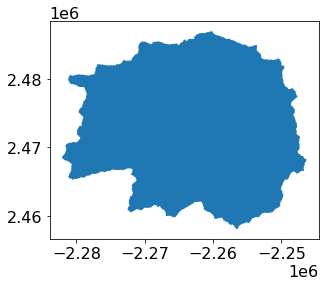

In [128]:
test_basin.plot()

C:\Users\Marianne\AppData\Local\Temp/ipykernel_13828/436379393.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...

  test = gpd.sjoin(test_basin,snowzone_rp)


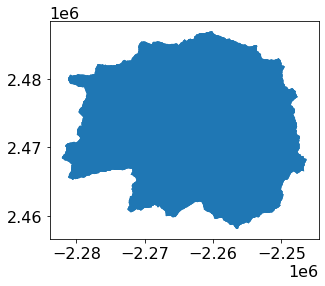

In [129]:
test = gpd.sjoin(test_basin,snowzone_rp)

fig,ax = plt.subplots()
test.plot(ax=ax)
plt.show()

In [54]:
## to do
## calculate how much of each basin is burned
## get mtbs burn severity layer and load
## clip to relevant years
## calculate how much of each basin is in the SSZ?
## how much of the burn area was SSZ?
## how to clip vectors to vectors?
## convert snowzone to a raster?
## need to download an elevation raster!! maybe SRTM?
## add contextily

,AREA,PERIMETER,GAGE_ID,geometry
1,79728300.0,55920.0,05014500,"POLYGON ((-1312215.000 2990115.000, -1312215.0..."


In [97]:
# test_snow = snowzone_rp.clip(test_basin.geometry)
test_snow =gpd.sjoin(snowzone_rp,test_basin)
fig,ax=plt.subplots()
test_snow.plot(ax=ax)
test_basin.boundary.plot(ax=ax)
#snowzone_rp.plot(ax=ax)

TypeError: '>=' not supported between instances of 'float' and 'Polygon'

In [59]:
ssz_raster = snowzone_rp.to_xarray()

In [81]:
fn = 'c:/users/marianne/documents/data/GOSIF/data.globalecology.unh.edu/data/GOSIF-GPP_v2/Monthly/Mean/GOSIF_GPP_2005.M08_Mean.tif'
tmp = rxr.open_rasterio(fn)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]] EPSG:4326


In [100]:
snowzone_4326 = snowzone.to_crs('epsg:4326')
gpp_snowzone = tmp.rio.clip(snowzone_4326.geometry)
test_gpp = tmp.rio.clip(test_basin.to_crs(tmp.rio.crs).geometry)


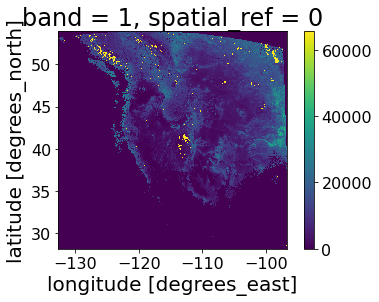

In [96]:
fig,ax = plt.subplots()
snowzone_4326.plot(ax=ax)
gpp_snowzone.plot(ax=ax)
plt.show()

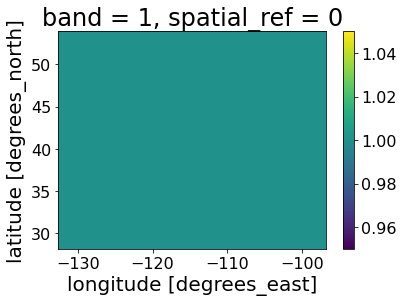

In [115]:
gpp_snowzone.notnull().plot()

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

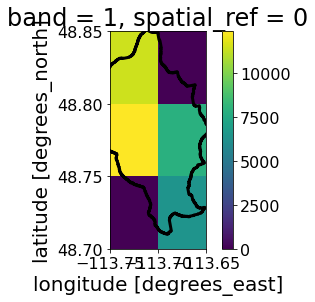

In [111]:
fig,ax=plt.subplots()
test_gpp.plot(ax=ax)
test_basin.to_crs(test_gpp.rio.crs).boundary.plot(ax=ax,color='k')

In [ ]:
## merge multiple fires? or just look at one year. what are the year bounds on the streamflow data
## how to get climate-based predictions
## runoff ratios from prism
## put this all on savio
## then autodownload and clip the prism bil files